In [53]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp

In [2]:
df = pd.read_csv("capstone_data_clean.csv")
df["Adv_Year"] = df["Adv_Year"].astype("category")
df["Adv_Month"] = df["Adv_Month"].astype("category")
df["Gearbox_Type"] = df["Gearbox_Type"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")

# Categorical features 

## Maker

As shown by statistical tests, Maker significantly influence the Price:
> Kruskal-Wallis H = 401677 
> p value = 0.0

Yet, the number of observations for each Maker considerably differ, which makes the analysis more vulnerable to errors.   

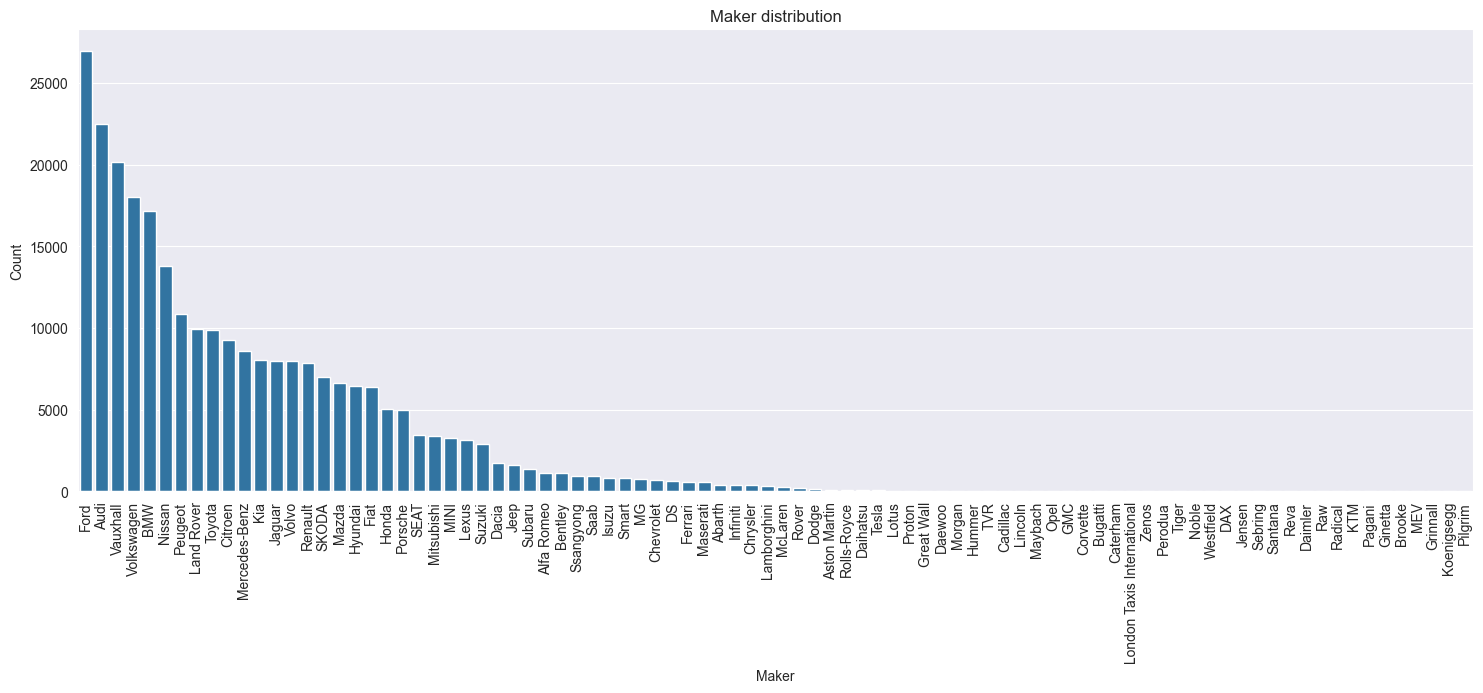

In [8]:
plt.figure(figsize=(18,6))
plt.title("Maker distribution")
plt.xlabel("Maker")
plt.ylabel("Count")

labels = df["Maker"].value_counts().index
counted = df["Maker"].value_counts().reset_index()

g = sns.barplot(counted, x="Maker", y="count", order=labels)

# g.bar_label(g.containers[0])
g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.show()

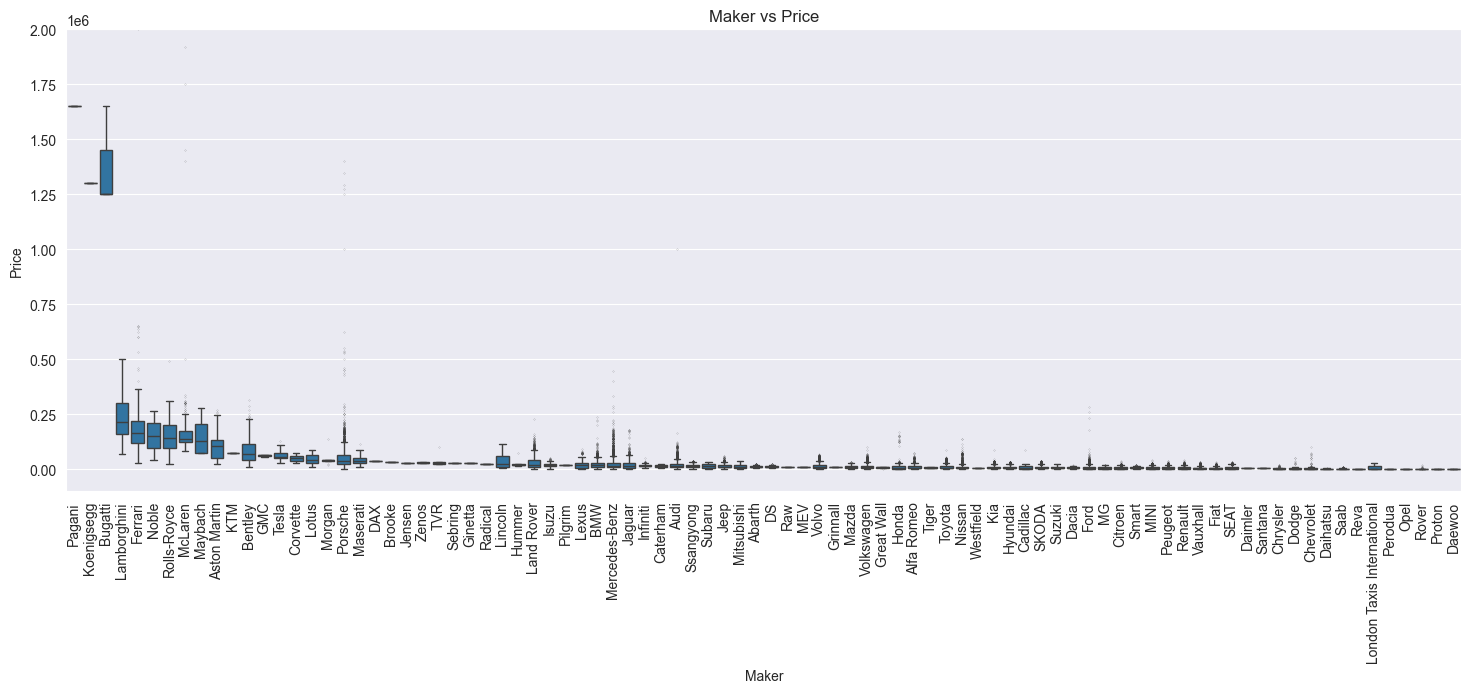

In [9]:
plt.figure(figsize=(18,6))
plt.title("Maker vs Price")
plt.xlabel("Maker")
plt.ylabel("Price")

labels = df.groupby("Maker")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=df, x="Maker", y="Price", fliersize=0.1, order=labels)

g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.ylim(-100000, 2000000)

plt.show()

#### 3 brands have a visibly higher values of Price than the others.

The total numbers of records for each of them is 1-3.
The sample size is too low to use them for analysis, and such a high values of Price might influence the results. 

In [15]:
most_expensive = df.groupby("Maker")["Price"].median().sort_values(ascending=False).head(3).index
df[df["Maker"].isin(most_expensive)]

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_Year,Adv_Month,Color,Body_Type,Gearbox_Type,Fuel_Type,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
1107,Bugatti,Veyron,13_1,13_1_1,2017,Jul,Red,Coupe,NaN,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,Bugatti,Veyron,13_1,13_1_2,2018,Apr,Multicolour,Coupe,Automatic,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,Bugatti,Veyron,13_1,13_1_3,2018,May,Black,Coupe,Automatic,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
78900,Koenigsegg,Ccx,44_1,44_1_1,2018,Feb,Black,Coupe,Manual,Petrol,...,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
130859,Pagani,Huayra,67_1,67_1_1,2017,Oct,Red,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's plot the Maker/Price relationship filtering them out

The differences between specific makers are still easily visible.

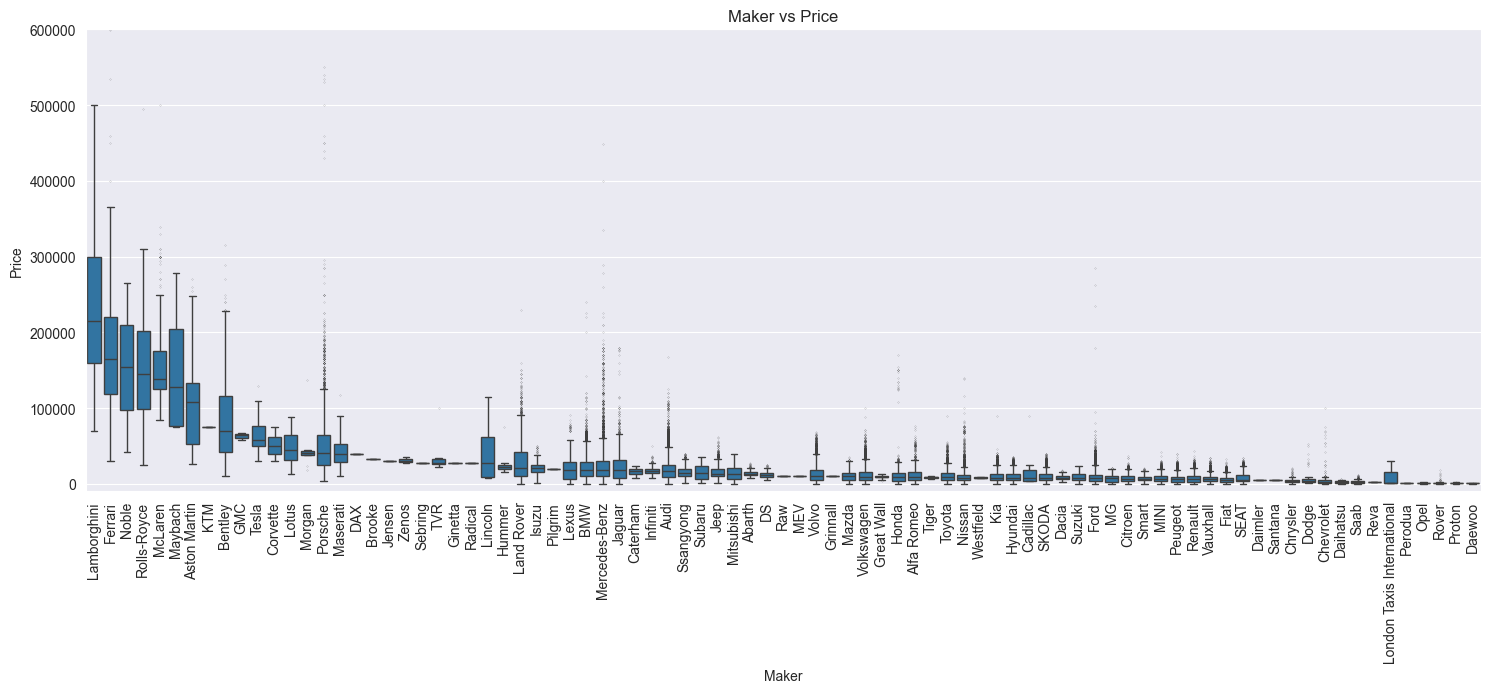

In [17]:
filtered = df[~df["Maker"].isin(most_expensive)]

plt.figure(figsize=(18,6))
plt.title("Maker vs Price")
plt.xlabel("Maker")
plt.ylabel("Price")

labels = filtered.groupby("Maker")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=filtered, x="Maker", y="Price", fliersize=0.1, order=labels)

g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.ylim(-10000, 600000)

plt.show()

#### Now let's check the Maker/Price relationship only for top 10 most frequently advertised brands

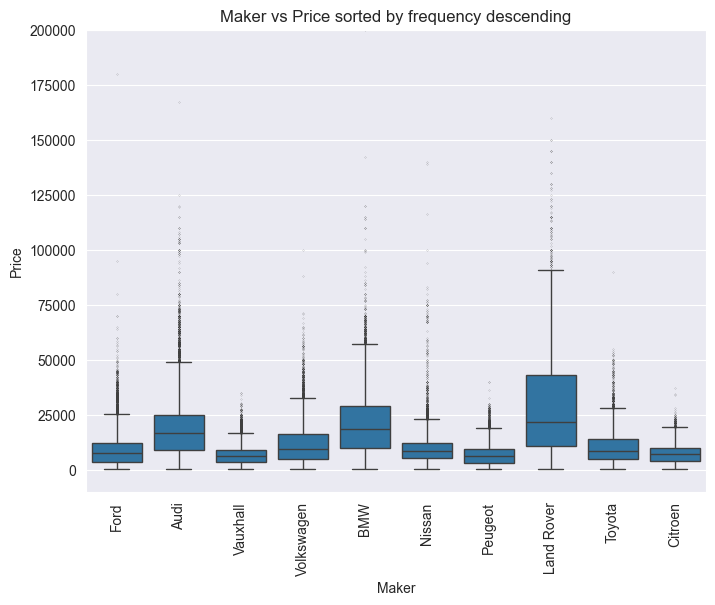

In [24]:
makers = df["Maker"].value_counts().head(10).index
common = df[df["Maker"].isin(makers)]

plt.figure(figsize=(8, 6))
plt.title("Maker vs Price sorted by frequency descending")
plt.xlabel("Maker")
plt.ylabel("Price")

labels = common["Maker"].value_counts().index
g = sns.boxplot(data=common, x="Maker", y="Price", fliersize=0.1, order=labels)

g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)
plt.ylim(-10000, 200000)

plt.show()

Even here the prices among makers vary considerably and the differences are still statistically significant, as shown below.

Prices for all makers are positively skewed, as in the case of the distribution of the price variable across the whole dataset. 

The X-axis is sorted by number of records for makers in descending order to check if there's trend that cheaper cars are being advertised more often. 
Based on the chart - in this dataset this is not the case.

In [25]:
def write_names(category):
    values = category.unique()
    names = {}
    numbers = {}
    cat_nr = 1
    for name in values:
        if name != np.nan:
            numbers[name] = cat_nr
            names[cat_nr] = name
            cat_nr += 1      
    return numbers, names

def swap(category, col_dict):
    return category.apply(lambda x : col_dict[x])

In [27]:
to_num, to_cat = write_names(common["Maker"])

In [41]:
common["Maker"] = swap(common["Maker"], to_num)


/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_6606/1446965180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common["Maker"] = swap(common["Maker"], to_num)


In [42]:
stats.kruskal(common["Maker"], common["Price"], nan_policy="omit")

KruskalResult(statistic=237503.26606295464, pvalue=0.0)

The critical $\Chi^2$ value for $\alpha$ = 0.05 and df = 8 is 15.507.

Restults of the Kruskal-Wallis test means that the results are statistically significant.
Conclusion: Prices among different makers vary significantly both across the whole dataset, and between 10 of the most common makers.

In [43]:
to_num

{'Citroen': 1,
 'Ford': 2,
 'Land Rover': 3,
 'Nissan': 4,
 'Peugeot': 5,
 'Audi': 6,
 'BMW': 7,
 'Toyota': 8,
 'Vauxhall': 9,
 'Volkswagen': 10}

In [56]:
common_notnull = common.copy()

In [57]:
common_notnull = common_notnull.dropna(how="any")

In [71]:
matrix = sp.posthoc_dunn(common_notnull, val_col='Price', group_col='Maker', p_adjust='holm')
matrix[matrix > 0.05]

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.999059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.999059,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Citroën and Ford not significantly different?

In [68]:
citroen = common[common["Maker"] == 1]
ford = common[common["Maker"] == 2]

In [69]:
stats.mannwhitneyu(ford["Price"], citroen["Price"], nan_policy="omit")

MannwhitneyuResult(statistic=131523955.0, pvalue=5.705666928863363e-14)

## Fuel Type

In [ ]:
df["Fuel_Type"].value_counts().reset_index()

In [ ]:
plt.title("Fuel Type distribution")
plt.xlabel("Fuel type")
plt.ylabel("Count")

labels = df["Fuel_Type"].value_counts().index
counted = df["Fuel_Type"].value_counts().reset_index()

g = sns.barplot(counted, x="Fuel_Type", y="count", order=labels)

g.bar_label(g.containers[0])
g.set_xticklabels(labels, rotation=90)

plt.show()

In [ ]:
plt.title("Fuel Type vs Price")
plt.xlabel("Fuel type")
plt.ylabel("Price")

labels = sample.groupby("Fuel_Type")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=sample, x="Fuel_Type", y="Price", fliersize=0, order=labels)

g.set_xticklabels(labels, rotation=90)
plt.ylim(-1000, 50000)

plt.show()